# Part 4: Homography + RANSAC

1. Load im01.jpg and im02.jpg. Based on SIFT, find matches between the two images. Show all the matches, similar to:

In [242]:
import cv2
import matplotlib.pyplot as plt

In [255]:
im01 = cv2.imread('part1_4/im01.jpg')
im01 = cv2.cvtColor(im01, cv2.COLOR_BGR2RGB)
im02 = cv2.imread('part1_4/im02.jpg')
im02 = cv2.cvtColor(im02, cv2.COLOR_BGR2RGB)

In [244]:
sift = cv2.SIFT_create()

im01_gray = cv2.cvtColor(im01, cv2.COLOR_BGR2GRAY)
im02_gray = cv2.cvtColor(im02, cv2.COLOR_BGR2GRAY)


kp1, des1 = sift.detectAndCompute(im01_gray, None)
kp2, des2 = sift.detectAndCompute(im02_gray, None)

line1 = cv2.drawKeypoints(im01, kp1, im01, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
line2 = cv2.drawKeypoints(im02, kp2, im02, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

array([[[128, 136, 159],
        [126, 137, 155],
        [130, 138, 159],
        ...,
        [254, 255, 255],
        [244, 245, 249],
        [235, 239, 251]],

       [[128, 139, 161],
        [127, 138, 158],
        [131, 139, 158],
        ...,
        [255, 255, 255],
        [248, 249, 251],
        [236, 238, 250]],

       [[128, 139, 161],
        [130, 138, 161],
        [130, 138, 159],
        ...,
        [255, 255, 255],
        [253, 254, 255],
        [238, 243, 249]],

       ...,

       [[ 18,  20,  19],
        [ 19,  18,  23],
        [ 25,  23,  28],
        ...,
        [ 29,  19,  20],
        [ 27,  18,  19],
        [ 29,  18,  22]],

       [[ 21,  21,  21],
        [ 21,  21,  23],
        [ 25,  25,  27],
        ...,
        [ 28,  24,  23],
        [ 25,  21,  20],
        [ 29,  23,  23]],

       [[ 20,  20,  18],
        [ 18,  18,  20],
        [ 23,  23,  25],
        ...,
        [ 29,  23,  23],
        [ 28,  23,  20],
        [ 28,  23,  20]]

In [245]:
import numpy as np

def match(des1, des2):
    best1 = np.zeros(des1.shape[0])
    best2 = np.zeros(des2.shape[0])

    for i in range(des1.shape[0]):
        distant = np.zeros(des2.shape[0])
        for j in range(des2.shape[0]):
            distant[j] = np.sum((des1[i] - des2[j]) ** 2)
        best1[i] = int(np.argmin(distant))
    
    for i in range(des2.shape[0]):
        distant = np.zeros(des1.shape[0])
        for j in range(des1.shape[0]):
            distant[j] = np.sum((des2[i] - des1[j]) ** 2)       
        best2[i] = int(np.argmin(distant))
    
    best1 = best1.astype(int)
    best2 = best2.astype(int)

    matches = []
    for i in range(best1.shape[0]):
        m = best1[i]
        n = best2[m]
        if i == n:
            matches.append([n, m])
            
    return matches
        

In [246]:
import random
def matchesLines(im01, im02, matches):
    imgs_matches = np.concatenate((im01,im02),axis = 1)
    colors = [
        (255, 0, 0),     
        (0, 255, 0),     
        (0, 0, 255),     
        (255, 255, 0),   
        (255, 0, 255),   
        (0, 255, 255),   
        (128, 128, 128), 
        (0, 0, 0),       
        (255, 255, 255)  
    ]

    for i in range(len(matches)):
        x1 = kp1[int(matches[i][0])].pt[0]
        y1 = kp1[int(matches[i][0])].pt[1]
        x2 = kp2[int(matches[i][1])].pt[0]
        y2 = kp2[int(matches[i][1])].pt[1]
        color_idx = random.randint(0,8)
        cv2.line(imgs_matches,(int(x1),int(y1)),(int(x2)+im01.shape[1],int(y2)),colors[color_idx],1)
    
    plt.imshow(imgs_matches)
    plt.axis('off')
    plt.show()

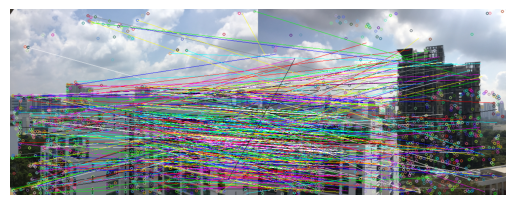

In [247]:
matches = match(des1, des2)
matchesLines(im01, im02, matches)

In [248]:
print(matches)
print(len(matches))

[[0, 1127], [3, 1089], [5, 755], [6, 726], [7, 1102], [41, 731], [42, 587], [45, 422], [47, 468], [57, 503], [61, 365], [71, 14], [74, 603], [79, 1122], [82, 1058], [83, 799], [87, 1099], [92, 805], [94, 1137], [100, 861], [101, 857], [107, 876], [108, 1174], [112, 926], [113, 977], [115, 706], [117, 1169], [119, 1126], [120, 990], [121, 816], [122, 997], [127, 905], [136, 211], [140, 988], [141, 771], [142, 796], [147, 987], [150, 1187], [154, 729], [156, 858], [157, 1138], [165, 763], [167, 630], [168, 1113], [170, 751], [178, 1091], [185, 35], [193, 965], [196, 525], [224, 595], [228, 1038], [230, 914], [231, 1080], [234, 968], [241, 128], [243, 920], [244, 747], [247, 877], [259, 715], [263, 1107], [270, 811], [279, 976], [313, 401], [318, 123], [327, 1048], [340, 473], [341, 474], [342, 1034], [345, 1177], [347, 577], [350, 411], [363, 842], [366, 1047], [369, 1171], [370, 1172], [401, 970], [414, 899], [416, 865], [425, 1070], [443, 825], [444, 1084], [459, 648], [461, 855], [466

2. Compute the best homography matrix using RANSAC, and show all the inlier matches (matches that support your best homography matrix):

In [256]:
def homography(points_1, points_2):
    points_1 = np.column_stack((points_1, np.ones(len(points_1))))
    points_2 = np.column_stack((points_2, np.ones(len(points_2))))

    A = np.zeros((2*len(points_1),9))
    for i in range(len(points_1)):
        x1, y1, _ = points_1[i]
        x2, y2, _ = points_2[i]
        A[2*i] = [x1, y1, 1, 0, 0, 0, -x1*x2, -y1*x2, -x2]
        A[2*i + 1] = [0, 0, 0, x1, y1, 1, -x1*y2, -y1*y2, -y2]

    U, D, V_T = np.linalg.svd(A)
    h = V_T[-1]
    H = h.reshape((3,3))
    H = H / H[2,2]
    return H

In [259]:

def RANSAC_homography(kp1, kp2, matches, iteration_times):
    n = 5
    final_H = []
    epsion = 1 # threshold of the distance of inliers
    N = len(matches)
    max_inliers = []
    
    for k in range(iteration_times):
        rdm = random.sample(range(0, N), 5)
        points_1 = []
        points_2 = []
        for j in range(n):
            points_1.append([kp1[int(matches[rdm[j]][0])].pt[0], kp1[int(matches[rdm[j]][0])].pt[1]])
            points_2.append([kp2[int(matches[rdm[j]][1])].pt[0], kp2[int(matches[rdm[j]][1])].pt[1]])

        H = homography(points_1, points_2)
        
        inliers = []
        
        for i in range(N):
            x1 = kp1[int(matches[i][0])].pt[0]
            y1 = kp1[int(matches[i][0])].pt[1]
            x2 = kp2[int(matches[i][1])].pt[0]
            y2 = kp2[int(matches[i][1])].pt[1]
            
            hx1, hy1, hz1 = np.dot(H, [x1, y1, 1])
            hx1 = int(hx1 / hz1)
            hy1 = int(hy1 / hz1)
            distance = np.sqrt((x2 - hx1) ** 2 + (y2 - hy1) ** 2)

            if distance < epsion:
                inliers.append(matches[i])
        
        if len(inliers) > len(max_inliers):
            max_inliers = inliers
    
    points_1 = []
    points_2 = []
    for i in range(len(max_inliers)):
        points_1.append([kp1[int(max_inliers[i][0])].pt[1], kp1[int(max_inliers[i][0])].pt[0]])
        points_2.append([kp2[int(max_inliers[i][1])].pt[1], kp2[int(max_inliers[i][1])].pt[0]])
    final_H = homography(points_1, points_2) 

    return final_H, max_inliers

77


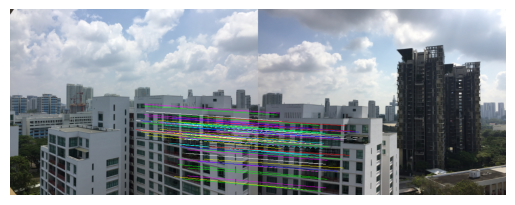

In [260]:

H, inliers = RANSAC_homography(kp1, kp2, matches, 10000)
print(len(inliers))
matchesLines(im01, im02, inliers)


3. Stitch the images together using the best homography matrix and show the result:

In [261]:
def transform(img01, img02, H):
    # Transform img01 to img02, H is the homography matrix from img01 to img02

    # 1. Get the size of transformed img01 
    rec_points = [[0,0],[img01.shape[0], 0], [img01.shape[0], img01.shape[1]],[0, img01.shape[1]]]
    transformed_rec_points = []
    for point in rec_points:
        x = point[0]
        y = point[1]
        i,j,k = np.dot(H, [x, y, 1])
        i = int(i/ k)
        j = int(j/k)
        transformed_rec_points.append([i, j])

    # 2. Compute the size of canvas
    canvas_height = img02.shape[0]
    canvas_width = img02.shape[1]

    min_i = min(point[0] for point in transformed_rec_points)
    max_i = max(point[0] for point in transformed_rec_points)
    min_j = min(point[1] for point in transformed_rec_points)
    max_j = max(point[1] for point in transformed_rec_points)

    canvas_height = max(max_i, canvas_height) - min(0, min_i) + 1
    canvas_width = max(max_j, canvas_width) - min(0, min_j) + 1
    
    # 3. Create Canvas
    canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8)
    canvas[abs(min(0, min_i)): abs(min(0, min_i))+img02.shape[0], abs(min(0, min_j)): abs(min(0, min_j))+img02.shape[1]] = img02

    # 4. For every point in the size of transformed img01, use the inverse of H to find the original point of img01
    for i in range(min_i, max_i):
        for j in range(min_j, max_j):
            x, y, z = np.dot(np.linalg.inv(H), [i, j, 1])
            x = int(x/z)
            y = int(y/z)
            if 0<=x< img01.shape[0] and 0<=y<img01.shape[1]:
                canvas[i + abs(min(0, min_i)), j + abs(min(0, min_j))] = img01[x,y]
    return canvas

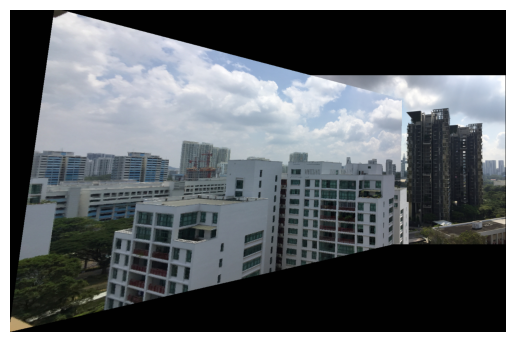

In [262]:
canvas = transform(im01, im02, H)
plt.imshow(canvas)
plt.axis('off')
plt.show()

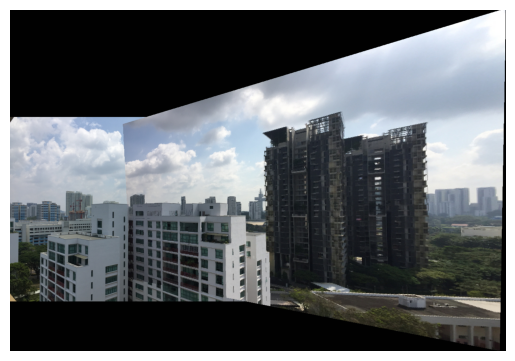

In [263]:
canvas = transform(im02, im01, np.linalg.inv(H))
plt.imshow(canvas)
plt.axis('off')
plt.show()